# Sklearn实现SVM1

In [16]:
# Sklearn实现SVM1
# 导入相关模块
from sklearn.svm import LinearSVC
import numpy as np

In [17]:
# 使用numpy 读取数据集
import numpy as np

def load_data(file_name):
    data = np.loadtxt(file_name, delimiter='\t')
    X = data[:, :-1]
    y = data[:, -1]
    return X, y

In [18]:
X,y = load_data('data/svm1.txt')


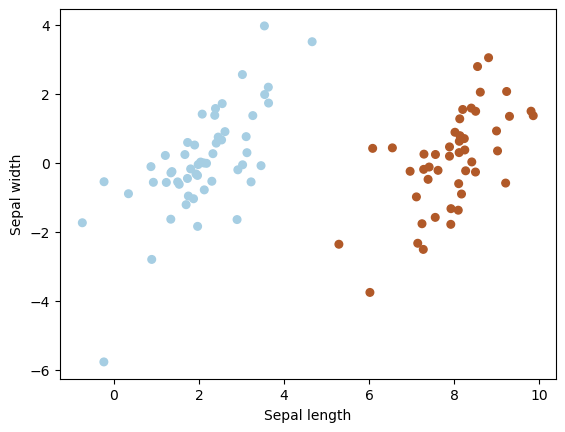

In [19]:
# 数据可视化
import matplotlib.pyplot as plt
figure = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [20]:
# 定义模型
model = LinearSVC(C=1.0, penalty='l2', loss='squared_hinge', dual=False)
# 训练模型
model.fit(X, y)

LinearSVC(dual=False)

In [21]:
# 输出权重与截距
b = model.intercept_
w = model.coef_
print("Weights:", w)
print("Intercept:", b)

Weights: [[ 0.43598085 -0.20627447]]
Intercept: [-2.12406798]


In [22]:
# 进行预测
y_pred = model.predict(X)

# 输出预测准确率
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


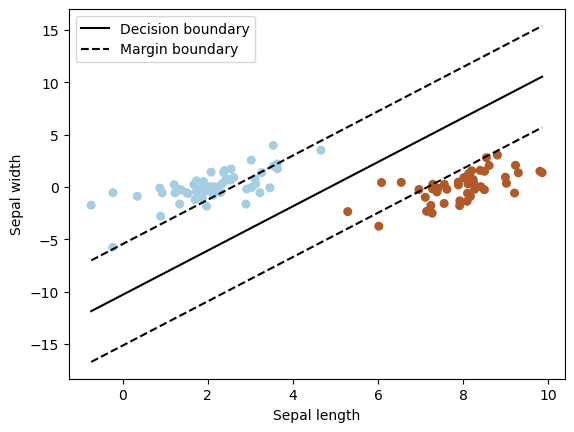

In [23]:
# 数据可视化
# 绘制分割超平面
import matplotlib.pyplot as plt
fig2 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# 绘制决策平面
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1 = (-w[0][0] * x0 - b) / w[0][1]

plt.plot(x0, x1, 'k-', label='Decision boundary')


x2 = (1-w[0][0] * x0 - b) / w[0][1]
x3 = (-1-w[0][0] * x0 - b) / w[0][1]

plt.plot(x0, x2, 'k--', label='Margin boundary')
plt.plot(x0, x3, 'k--')

plt.legend()
plt.show()

In [25]:
# 与逻辑回归进行对比
from sklearn.linear_model import LogisticRegression

logisticModel = LogisticRegression()
logisticModel.fit(X, y)

# 输出模型的系数
lw= logisticModel.coef_
lb= logisticModel.intercept_
print("逻辑回归模型的系数为：",lw)
print("逻辑回归模型的截距为：",lb)

# 输出模型的评分
print(logisticModel.score(X, y))

逻辑回归模型的系数为： [[ 1.87248162 -0.57157483]]
逻辑回归模型的截距为： [-9.34359837]
1.0


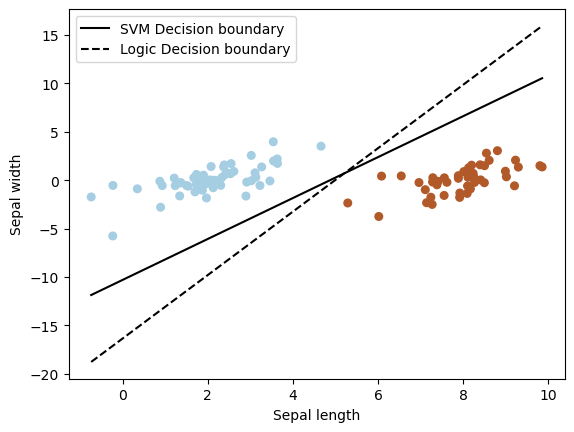

In [26]:
# 图像对比逻辑回归和SVM的区别
# 数据可视化
# 绘制分割超平面
import matplotlib.pyplot as plt
fig2 = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# 绘制决策平面
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1 = (-w[0][0] * x0 - b) / w[0][1]
x2 = (-lw[0][0] * x0 - lb) / lw[0][1]

plt.plot(x0, x1, 'k-', label='SVM Decision boundary')
plt.plot(x0, x2, 'k--', label='Logic Decision boundary')

plt.legend()
plt.show()